This calculator is designed to calculate whether it's better to buy a home, or rent and invest savings

Many wild assumptions ahead, but hopefully at least the math is correct.

We should also answer a couple of questions, like:
Should you pay your mortgage as quickly as possible, or invest additional available income instead?

Should make it so that you can start at a later year. Plots over a variety of values

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Some important variables:
note: do we also want to consider their uncertainty?
We probably want to separate these into their own cells, each with sources/derivation

In [22]:
initial_savings = 50000 #amount available to spend in year 0
home_cost = 650000 #cost of a home
#expected_interest_rate = 3.5 #assumed average interest rate per year
#expected_inflation_rate = 3 #assumed average inflation per year
#expected_home_equity_growth_rate = 7.5 #expected growth in value of home per year
home_purchase_costs = 5000 #costs of buying a home
#home_maintainance_costs = 1000 #average amount spend per year on home 
#capital_gains_tax = 5 #tax rate on contributions over tax free amount?
#property_tax = 2 #tax rate for property
down_payment = 20 #percentage of home you pay initially
prime = 1
mortgage_rate = expected_interest_rate + prime # Should we assume rental income = mortgage here? 
#can maintainance costs be ommitted then too?
years = 10
years_arr = np.arange(0,years)
mortgage_years = 30

Expected home value growth rate: estimated from
https://www.crea.ca/housing-market-stats/mls-home-price-index/hpi-tool/

Note that we are ignoring inflation!

In [25]:
expected_home_value_growth_rate = 15 / 2.5 

Mortgage payments are calculated as the mortgage rate $\times$ outstanding debt

Here we calculate the mortgage payments for each year, assuming a fixed rate mortgage with the interest rate defined above

In [27]:
principal = home_cost - down_payment
yearly_mortgage_payment = principal * ( (expected_interest_rate / 100) * np.power(1 + expected_interest_rate / 100, mortgage_years) / (np.power(1 + expected_interest_rate / 100, mortgage_years) - 1))
mortgage_payments = mortgage_rate * years_arr

print yearly_mortgage_payment

total_home_cost = yearly_mortgage_payment + property_tax + maintenance_cost

35340.2781181932


Home equity: home value increases per year, home equity grows with home value and with decreased debt due to mortgage payments

In [29]:
print home_equity_value

[2.00000000e+01 3.90245000e+04 8.03690000e+04 1.24193900e+05
 1.70648024e+05 2.19889125e+05 2.72084423e+05 3.27411168e+05
 3.86057248e+05 4.48221823e+05]


In [28]:
home_value = home_cost*np.power(1+(expected_home_value_growth_rate)/100,years_arr)
debt = (home_cost - down_payment) - mortgage_payments
home_equity_value = home_value - debt

Text(0.5,0,'years')

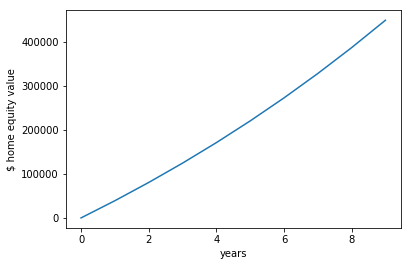

In [30]:
plt.plot(years_arr,home_equity_value)
plt.ylabel("$ home equity value")
plt.xlabel("years")

But let's not forget that property taxes + maintenance costs are also included in home cost.

Property tax estimate from

https://vancouver.ca/home-property-development/residential.aspx

Assuming home cost = home value, and using estimate for property tax.

In [35]:
property_tax = home_value * 2.5/1000
maintenance_cost = home_value * 0.001

yearly_home_expenses = mortgage_payments + property_tax + maintenance_cost

What if you rented instead of bought? Let's say that you invested your home purchase costs in the stock/bond market instead, as well as any difference in cost between renting and owning. The value of investments:

In [31]:
initial_investment = initial_savings

How much do you invest per year? Let's say you invest whatever you would have spent on a home, minus rental costs

In [32]:
monthly_rent = 2800
rental_cost = monthly_rent * 12

In [ ]:
expected_investment_growth_rate = 7.5 #expected growth rate per year for investments
yearly_surplus = 5000 #amount set aside for investment
yearly_invested = yearly_surplus #could be a percentage; extra goes to mortgage

In [17]:
print initial_investment

50000


In [18]:
print years_arr
print yearly_invested * np.power(1+(expected_investment_growth_rate-expected_inflation_rate)/100,years_arr)
sum = np.cumsum(yearly_invested*np.power(1+(expected_investment_growth_rate-expected_inflation_rate)/100,years_arr)) 
print sum

[0 1 2 3 4 5 6 7 8 9]
[5000.         5225.         5460.125      5705.830625   5962.59300312
 6230.90968827 6511.30062424 6804.30915233 7110.50306418 7430.47570207]
[ 5000.         10225.         15685.125      21390.955625
 27353.54862812 33584.45831639 40095.75894063 46900.06809296
 54010.57115714 61441.04685921]


In [19]:
investment_value = initial_investment*np.power(1+(expected_investment_growth_rate-expected_inflation_rate)/100,years_arr)+sum

In [20]:
print investment_value

[ 55000.          62475.          70286.375       78449.261875
  86979.47865937  95893.55519905 105208.765183   114943.15961624
 125115.60179897 135745.80387992]


Text(0.5,0,'years')

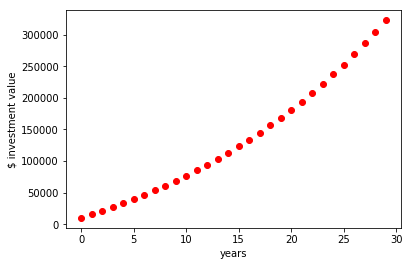

In [12]:
plt.plot(years_arr,investment_value,"ro")
plt.ylabel("$ investment value")
plt.xlabel("years")

Showing everything together....

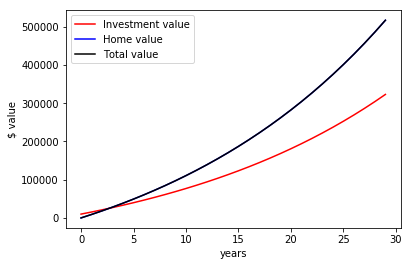

In [13]:
plt.plot(years_arr,investment_value,"r-", label="Investment value")
plt.plot(years_arr,home_equity_value,"b-",label="Home value")
plt.plot(years_arr,home_equity_value,"k-",label="Total value")
plt.ylabel("$ value")
plt.xlabel("years")
plt.legend()